<a href="https://colab.research.google.com/github/Polapob/Twitter-Prediction-Kaggle/blob/main/Twitter_NLP_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c nlp-getting-started

  0% 0.00/411k [00:00<?, ?B/s]
100% 411k/411k [00:00<00:00, 61.2MB/s]
  0% 0.00/965k [00:00<?, ?B/s]
100% 965k/965k [00:00<00:00, 63.7MB/s]
  0% 0.00/22.2k [00:00<?, ?B/s]
100% 22.2k/22.2k [00:00<00:00, 22.5MB/s]


In [ ]:
import pandas as pd
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("sample_submission.csv")

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
train.head(100)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
95,137,accident,Charlotte,9 Mile backup on I-77 South...accident blockin...,1
96,138,accident,"Baton Rouge, LA",Has an accident changed your life? We will hel...,0
97,139,accident,"Hagerstown, MD",#BREAKING: there was a deadly motorcycle car a...,1
98,141,accident,"Gloucestershire , UK",@flowri were you marinading it or was it an ac...,0


In [ ]:
train["keyword"].isnull()

0       True
1       True
2       True
3       True
4       True
        ... 
7608    True
7609    True
7610    True
7611    True
7612    True
Name: keyword, Length: 7613, dtype: bool

In [ ]:
import numpy as np
train.loc[train["keyword"].isnull() == True,"keyword"] = "No Keyword"
train.loc[train["location"].isnull() == True,"location"] = "No Location"

In [ ]:
#Check keyword
All_train_keyword = pd.DataFrame(train.keyword.value_counts())
All_train_keyword.reset_index()
All_train_keyword.rename(columns={"keyword":"Occurrence","index":'word'},inplace=True)

In [ ]:
All_train_keyword

,Occurrence
No Keyword,61
fatalities,45
deluge,42
armageddon,42
damage,41
...,...
forest%20fire,19
epicentre,12
threat,11
inundation,10


In [ ]:
for i in All_train_keyword.index:
  print(i)

No Keyword
fatalities
deluge
armageddon
damage
body%20bags
sinking
harm
fear
outbreak
collided
evacuate
siren
twister
windstorm
weapon
derailment
flames
wreckage
hellfire
collision
explosion
earthquake
wrecked
sunk
famine
whirlwind
sinkhole
weapons
ambulance
explode
derailed
deaths
upheaval
drowned
typhoon
bombed
flooding
thunder
fire
oil%20spill
blaze
injury
hurricane
fatal
hostages
wreck
curfew
burning%20buildings
pandemonium
emergency
ruin
fatality
sandstorm
debris
crush
bioterror
mudslide
police
blizzard
panic
destroy
quarantined
wounded
desolation
nuclear%20reactor
danger
attack
detonate
massacre
cliff%20fall
catastrophe
tragedy
floods
screaming
engulfed
devastation
displaced
dust%20storm
ablaze
refugees
death
evacuated
evacuation
structural%20failure
accident
blood
flood
rescuers
attacked
rescued
storm
casualties
inundated
buildings%20burning
razed
drought
bleeding
hijacker
demolition
airplane%20accident
rioting
tornado
emergency%20plan
screams
hail
bridge%20collapse
injured
suic

First, remove url in text

In [ ]:
import re
def clean_url(text):
  return re.sub(r'http\S+',"",text)
def clean_url2(text):
  return re.sub(r'https\S+',"",text)
train["text"] = train["text"].apply(lambda x : clean_url(x))
train["text"] = train["text"].apply(lambda x : clean_url2(x))
test["text"] = test["text"].apply(lambda x:clean_url(x))
test["text"] = test["text"].apply(lambda x:clean_url2(x))

In [ ]:
train.drop(columns="id",inplace=True)


KeyError: ignored

In [ ]:
test.drop(columns="id",inplace=True)

In [ ]:
y_train = train.target.values

In [ ]:
train.head(50)

,keyword,location,text,target
0,No Keyword,No Location,Our Deeds are the Reason of this #earthquake M...,1
1,No Keyword,No Location,Forest fire near La Ronge Sask. Canada,1
2,No Keyword,No Location,All residents asked to 'shelter in place' are ...,1
3,No Keyword,No Location,"13,000 people receive #wildfires evacuation or...",1
4,No Keyword,No Location,Just got sent this photo from Ruby #Alaska as ...,1
5,No Keyword,No Location,#RockyFire Update => California Hwy. 20 closed...,1
6,No Keyword,No Location,#flood #disaster Heavy rain causes flash flood...,1
7,No Keyword,No Location,I'm on top of the hill and I can see a fire in...,1
8,No Keyword,No Location,There's an emergency evacuation happening now ...,1
9,No Keyword,No Location,I'm afraid that the tornado is coming to our a...,1


second remove @account

In [ ]:
def clean_tag(text):
  return re.sub(r'@\S+',"",text)
train["text"] = train["text"].apply(lambda x : clean_tag(x))
test["text"] = test["text"].apply(lambda x:clean_tag(x))

Third Make word dictionary and consider word

In [ ]:
vocab = {}
for i in train.text.values:
  for j in i.strip().split():
    try:
      vocab[j] += 1
    except:
      vocab[j] = 1


In [ ]:
!kaggle datasets download -d bertcarremans/glovetwitter27b100dtxt

 95% 376M/397M [00:02<00:00, 202MB/s]
100% 397M/397M [00:02<00:00, 174MB/s]


In [ ]:
!unzip glovetwitter27b100dtxt.zip

Archive:  glovetwitter27b100dtxt.zip
  inflating: glove.twitter.27B.100d.txt  


In [ ]:
word = [[word,occurrence] for word,occurrence in vocab.items()]
word

[['Our', 25],
 ['Deeds', 1],
 ['are', 345],
 ['the', 2575],
 ['Reason', 5],
 ['of', 1722],
 ['this', 335],
 ['#earthquake', 8],
 ['May', 16],
 ['ALLAH', 1],
 ['Forgive', 1],
 ['us', 53],
 ['all', 178],
 ['Forest', 29],
 ['fire', 148],
 ['near', 50],
 ['La', 11],
 ['Ronge', 1],
 ['Sask.', 1],
 ['Canada', 4],
 ['All', 52],
 ['residents', 4],
 ['asked', 9],
 ['to', 1805],
 ["'shelter", 1],
 ['in', 1757],
 ["place'", 1],
 ['being', 67],
 ['notified', 1],
 ['by', 469],
 ['officers.', 1],
 ['No', 53],
 ['other', 31],
 ['evacuation', 32],
 ['or', 181],
 ['shelter', 4],
 ['place', 22],
 ['orders', 11],
 ['expected', 11],
 ['13,000', 1],
 ['people', 146],
 ['receive', 2],
 ['#wildfires', 5],
 ['California', 89],
 ['Just', 48],
 ['got', 103],
 ['sent', 12],
 ['photo', 8],
 ['from', 372],
 ['Ruby', 1],
 ['#Alaska', 2],
 ['as', 282],
 ['smoke', 33],
 ['pours', 1],
 ['into', 162],
 ['a', 1845],
 ['school', 47],
 ['#RockyFire', 4],
 ['Update', 6],
 ['=>', 1],
 ['Hwy.', 4],
 ['20', 13],
 ['closed', 1

In [ ]:
word = sorted(word,key = lambda x:x[1],reverse=True)
sort_dict = {}
for i in word:
  sort_dict[i[0]] = i[1]
sort_dict 

{'the': 2575,
 'a': 1845,
 'to': 1805,
 'in': 1757,
 'of': 1722,
 'and': 1302,
 'I': 1197,
 'for': 820,
 'is': 814,
 'on': 773,
 '-': 764,
 'you': 632,
 'The': 552,
 'my': 549,
 'with': 508,
 'that': 492,
 'at': 485,
 'by': 469,
 'it': 433,
 'from': 372,
 'be': 371,
 'was': 363,
 'have': 353,
 'are': 345,
 'this': 335,
 'like': 318,
 '&amp;': 295,
 'A': 290,
 'as': 282,
 'just': 258,
 'your': 254,
 'up': 250,
 'but': 250,
 'me': 244,
 'so': 239,
 'not': 236,
 'has': 229,
 'out': 226,
 "I'm": 225,
 '??': 214,
 'will': 210,
 'via': 208,
 'after': 206,
 'an': 204,
 'about': 192,
 'been': 185,
 'get': 183,
 'or': 181,
 'when': 181,
 'all': 178,
 'no': 178,
 'into': 162,
 'over': 158,
 'In': 155,
 'who': 150,
 'we': 149,
 'fire': 148,
 '...': 147,
 'people': 146,
 'they': 145,
 '2': 145,
 'if': 143,
 '|': 142,
 'one': 142,
 'can': 141,
 'i': 139,
 'he': 139,
 'than': 132,
 "don't": 128,
 'more': 128,
 'do': 124,
 'what': 120,
 'would': 116,
 "it's": 115,
 'his': 115,
 'how': 111,
 'her': 11

In [ ]:
def load_glove_word():    
    EMBEDDING_FILE = 'glove.twitter.27B.100d.txt'
    dict_word = {}
    infile = open(EMBEDDING_FILE,"r")
    for line in infile:
      each_word = line.strip()[:line.find(" ")]
      others = np.array(line.strip()[line.find(" "):].strip().split(),dtype=float)
      dict_word[each_word] = others
    infile.close()
    return dict_word
glove_word = load_glove_word()

In [ ]:
import operator
def check_coverage(vocab,embeddings_index):
    a = {}
    oov = {}
    k = 0
    i = 0
    for word in vocab.keys():
        try:
            a[word] = embeddings_index[word]
            k += vocab[word]
        except:
            oov[word] = vocab[word]
            i += vocab[word]
            pass
    print('Found embeddings for {:.2%} of vocab'.format(len(a) / len(vocab)))
    print('Found embeddings for  {:.2%} of all text'.format(k / (k + i)))
    sorted_x = sorted(oov.items(), key=operator.itemgetter(1))[::-1]

    return sorted_x
OOV_Vocab_in_twitter_data = check_coverage(sort_dict,glove_word)

Found embeddings for 29.64% of vocab
Found embeddings for  59.48% of all text


In [ ]:
OOV_Vocab = pd.DataFrame(OOV_Vocab_in_twitter_data,columns=["Word","Occurrence"])
OOV_Vocab

,Word,Occurrence
0,I,1197
1,The,552
2,A,290
3,I'm,225
4,??,214
...,...,...
17581,Sask.,1
17582,Ronge,1
17583,Forgive,1
17584,ALLAH,1


In [ ]:
Checkword = ["He","She","It","I"]
check = True
for i in Checkword:
  try:
    glove_word["I"]
  except:
    check = False
    break
if check == True:
  print("Case sensitive")
else:
  print("Case unsensitive with lowercase")

Case unsensitive with lowercase


In [ ]:
#Lower every word for glove embedding
def generate_vocab(dataframe):
  vocab = {}
  for i in dataframe.text.values:
    for j in i.strip().split():
      try:
        vocab[j.lower()] += 1
      except:
        vocab[j.lower()] = 1
  word = [[word,occurrence] for word,occurrence in vocab.items()]
  word = sorted(word,key = lambda x:x[1],reverse=True)
  sort_dict = {}
  for i in word:
    sort_dict[i[0]] = i[1]
  return sort_dict
vocab_new = generate_vocab(train)


In [ ]:
vocab_new

{'the': 3207,
 'a': 2135,
 'in': 1949,
 'to': 1934,
 'of': 1814,
 'and': 1405,
 'i': 1336,
 'is': 930,
 'for': 880,
 'on': 834,
 '-': 764,
 'you': 746,
 'my': 671,
 'with': 562,
 'that': 538,
 'at': 532,
 'by': 514,
 'it': 504,
 'this': 463,
 'from': 420,
 'are': 397,
 'be': 396,
 'was': 381,
 'have': 380,
 'like': 341,
 'as': 327,
 'just': 313,
 'but': 311,
 'so': 310,
 '&amp;': 295,
 'up': 292,
 'not': 288,
 'your': 287,
 'me': 275,
 'after': 256,
 'will': 254,
 'has': 247,
 'an': 243,
 'all': 241,
 'no': 239,
 'out': 239,
 "i'm": 237,
 'when': 237,
 'if': 234,
 'get': 227,
 'we': 223,
 'new': 215,
 '??': 214,
 'via': 214,
 'about': 213,
 'fire': 209,
 'or': 201,
 'more': 200,
 'they': 191,
 'been': 190,
 'he': 189,
 'how': 187,
 'what': 185,
 'over': 179,
 'one': 179,
 'now': 177,
 'who': 177,
 "it's": 176,
 'people': 174,
 'into': 171,
 "don't": 168,
 'do': 161,
 'can': 159,
 '...': 147,
 '2': 145,
 '|': 142,
 'emergency': 141,
 'than': 138,
 'there': 136,
 'would': 128,
 'some': 1

In [ ]:
print("After lowercase")
OOV_Vocab_in_twitter_data = check_coverage(vocab_new,glove_word)

After lowercase
Found embeddings for 52.24% of vocab
Found embeddings for  83.02% of all text


In [ ]:
OOV1 = pd.DataFrame(OOV_Vocab_in_twitter_data,columns=["Word","Occurrence"])


In [ ]:
OOV1.shape[0]

10057

In [ ]:
OOV1.iloc[1100:1150,:]

,Word,Occurrence
1100,3-inspired,2
1101,snowstorm',2
1102,snowstorm.,2
1103,#treeporn,2
1104,#hampshire,2
1105,#southdowns,2
1106,already.,2
1107,battlefield.,2
1108,on?,2
1109,ww2,2


In [ ]:
dict_correction = {"it's":"it is","don't":"do not","can't":"cannot","you're":"you are",
                   "that's":"that is","i've":"i have","he's":"he is","there's":"there is","doesn't":"does not",
                   "what's":"what is","didn't":"did not","disea...":"disease","we're":"we are","let's":"let us",
                   "isn't":"is not","she's":"she is","reddit's":"reddit","ain't":"am not",
                   "won't":"will not","wasn't":"was not","hasn't":"has not","aren't":"are not",
                   "you'll":"you will","'it's	":"it is","shouldn't":"should not",":(":"sad",
                   ":p":"frustration","'i'm":"i am","we've":"we have","you've":"you have",
                   ":d":"very happy","wouldn't":"would not","y'all":"you all",":-)":"happy",
                   "they'll":"they will","weren't":"were not","they've":"they have","triple-digit":"triple digit",
                   "it'll":"it will","couldn't":"could not","red-light":"red light",
                   "you'd":"you would","they'd":"they would","we'd":"we would","3:":"smile",
                   ";-;":"cry","harm/kid":"harm kid","i'm":"i am","i'll":"i will","i'd":"i would",
                   "donªt":"do not","youªve":"you have"
                   }

In [ ]:
train

,keyword,location,text,target
0,No Keyword,No Location,our deeds are the reason of this # earthq...,1
1,No Keyword,No Location,forest fire near la ronge sask . canada,1
2,No Keyword,No Location,all residents asked to ' shelter in place ' ...,1
3,No Keyword,No Location,"# # , # # # people receiv...",1
4,No Keyword,No Location,just got sent this photo from ruby # alas...,1
...,...,...,...,...
7608,No Keyword,No Location,two giant cranes holding a bridge collapse int...,1
7609,No Keyword,No Location,the out of control wild fires in california ...,1
7610,No Keyword,No Location,m # . # # [ # # : ...,1
7611,No Keyword,No Location,police investigating after an e - bike col...,1


In [ ]:
def clean_text(text):
  str_word = str(text.lower())
  for k in dict_correction:
    str_word = str_word.replace(k,dict_correction[k])
  return str_word
train["text"] = train["text"].apply(lambda x: clean_text(x))
test["text"] = test["text"].apply(lambda x:clean_text(x))

In [ ]:
test

,keyword,location,text
0,NaN,NaN,just happened a terrible car crash
1,NaN,NaN,"heard about #earthquake is different cities, s..."
2,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,NaN,NaN,apocalypse lighting. #spokane #wildfires
4,NaN,NaN,typhoon soudelor kills 28 in china and taiwan
...,...,...,...
3258,NaN,NaN,earthquake safety los angeles ûò safety faste...
3259,NaN,NaN,storm in ri worse than last hurricane. my city...
3260,NaN,NaN,green line derailment in chicago
3261,NaN,NaN,meg issues hazardous weather outlook (hwo)


In [ ]:
vocab_after_clean = generate_vocab(train)
OOV_Vocab_in_twitter_data = check_coverage(vocab_after_clean,glove_word)

Found embeddings for 87.96% of vocab
Found embeddings for  98.30% of all text


In [ ]:
df2 = pd.DataFrame(OOV_Vocab_in_twitter_data,columns=["Word","Occurrence"])
df2

,Word,Occurrence
0,bioterror,33
1,prebreak,30
2,bioterrorism,28
3,soudelor,26
4,bestnaijamade,24
...,...,...
1704,lanford,1
1705,ancop,1
1706,superintende,1
1707,africanbaze,1


In [ ]:
OOV1.iloc[1150:1200,:]

,Word,Occurrence
1150,recap/,2
1151,world's,2
1152,'couple,2
1153,/(,2
1154,./.....hmm,2
1155,wowo--===,2
1156,humanity.,2
1157,just-married,2
1158,#zippednews,2
1159,njenga,2


In [ ]:
glove_word["'"]

array([-6.6233e-04,  4.0447e-01, -3.0690e-01,  1.1301e+00, -1.0145e-01,
        5.1167e-01, -8.7644e-01, -3.3699e-01,  1.6792e-01,  2.4637e-01,
        2.1694e-01,  1.9531e-01, -2.5949e+00,  5.3335e-01, -5.0094e-01,
       -8.3807e-01, -6.4759e-01,  7.6480e-02, -1.1554e+00, -1.4584e-01,
       -3.2704e-01, -1.1782e+00,  1.0696e-02,  2.8400e-01,  3.7299e-01,
       -2.1549e+00, -4.7814e-02, -8.2386e-01,  6.3026e-01, -1.6637e-01,
        2.5018e-01, -8.4948e-03, -1.5910e+00,  3.1986e-01,  8.2187e-01,
        4.6922e-01, -1.0070e-01,  1.2060e-02,  2.9303e-01, -5.6286e-01,
       -1.2598e+00, -8.9768e-01,  2.4414e-01, -1.6206e-04,  3.3274e-01,
        3.2121e-01, -2.4878e-01,  5.0429e-01,  2.4093e-01,  5.6851e-02,
       -7.2483e-01,  3.8998e-01,  1.3530e-03,  1.7482e-01, -1.9056e-01,
        3.4062e-01, -3.5988e-01,  2.7297e-01,  7.6069e-03,  4.6856e-01,
       -1.2769e+00,  6.8189e-01, -2.0969e-01, -3.4072e-01,  2.2407e-02,
       -2.5656e-01, -8.0496e-03, -8.1949e-01, -4.3136e-01,  2.74

In [ ]:
puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';',  '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', '¹', '≤', '‡', '√',"'" ]
for i in puncts:
  try:
    glove_word[i]
  except:
    print(str(i)+" not in glove word vector")


In [ ]:
def clean_text(x):
    x = str(x)
    for punct in puncts:
        if punct in x:
            x = x.replace(punct, f' {punct} ')
    return x

def clean_numbers(x):
    if bool(re.search(r'\d', x)):
        x = re.sub('[0-9]{5,}', '#####', x)
        x = re.sub('[0-9]{4}', '####', x)
        x = re.sub('[0-9]{3}', '###', x)
        x = re.sub('[0-9]{2}', '##', x)
        x = re.sub('[0-9]{1}', '#', x)
    return x


In [ ]:
train["text"]= train.text.apply(lambda x: clean_text(x))
train["text"]= train.text.apply(lambda x: clean_numbers(x))
test["text"] = test.text.apply(lambda x:clean_text(x))
test["text"] = test.text.apply(lambda x:clean_numbers(x))

In [ ]:
train

,keyword,location,text,target,len_text,clean_text
0,No Keyword,No Location,our deeds are the reason of this # ...,1,71,our deeds are the reason of this # earthquake ...
1,No Keyword,No Location,forest fire near la ronge sask . ...,1,40,forest fire near la ronge sask . canada
2,No Keyword,No Location,all residents asked to ' shelte...,1,137,all residents asked to ' shelter in place ' ar...
3,No Keyword,No Location,# # ...,1,71,"# # , # # # people receive # wildfires evacuat..."
4,No Keyword,No Location,just got sent this photo from ruby #...,1,90,just got sent this photo from ruby # alaska as...
...,...,...,...,...,...,...
7608,No Keyword,No Location,two giant cranes holding a bridge collapse int...,1,61,two giant cranes holding a bridge collapse int...
7609,No Keyword,No Location,the out of control wild fires in california ...,1,102,the out of control wild fires in california ev...
7610,No Keyword,No Location,m # . ...,1,57,m # . # # [ # # : # # utc ] ? # km s of volcan...
7611,No Keyword,No Location,police investigating after an e - ...,1,146,police investigating after an e - bike collide...


In [ ]:
test

,keyword,location,text
0,NaN,NaN,just happened a terrible car crash
1,NaN,NaN,heard about # earthquake is different citie...
2,NaN,NaN,"there is a forest fire at spot pond , geese..."
3,NaN,NaN,apocalypse lighting . # spokane # wil...
4,NaN,NaN,typhoon soudelor kills ## in china and taiwan
...,...,...,...
3258,NaN,NaN,earthquake safety los angeles ûò safety faste...
3259,NaN,NaN,storm in ri worse than last hurricane . my ...
3260,NaN,NaN,green line derailment in chicago
3261,NaN,NaN,meg issues hazardous weather outlook ( hwo ...


In [ ]:
vocab_after_clean = generate_vocab(train)
OOV_Vocab_in_twitter_data = check_coverage(vocab_after_clean,glove_word)

Found embeddings for 88.70% of vocab
Found embeddings for  98.54% of all text


In [ ]:
OOV_Vocab_in_twitter_data

[('soudelor', 26),
 ('bestnaijamade', 24),
 ('funtenna', 17),
 ('udhampur', 13),
 ('inundation', 9),
 ('spos', 9),
 ('linkury', 7),
 ('fnet', 7),
 ('mhtw', 7),
 ('sinjar', 6),
 ('dorret', 6),
 ('kerricktrial', 5),
 ('twia', 5),
 ('naved', 5),
 ('sittwe', 5),
 ('summerfate', 5),
 ('idfire', 4),
 ('karymsky', 4),
 ('japì', 4),
 ('wisenews', 4),
 ('carryi', 4),
 ('lulgzimbestpicts', 4),
 ('ramag', 4),
 ('yazidis', 4),
 ('waimate', 4),
 ('otrametlife', 4),
 ('abbswinston', 4),
 ('oppressions', 4),
 ('slanglucci', 4),
 ('fettilootch', 4),
 ('worstsummerjob', 4),
 ('warfighting', 4),
 ('beforeitsnews', 4),
 ('pbban', 4),
 ('votejkt', 4),
 ('rockyfire', 4),
 ('throwingknifes', 3),
 ('godslove', 3),
 ('usnwsgov', 3),
 ('metrofmtalk', 3),
 ('bookboost', 3),
 ('ibooklove', 3),
 ('aoms', 3),
 ('blowmandyup', 3),
 ('offensivecontent', 3),
 ('onlinecommunities', 3),
 ('fennovoima', 3),
 ('faroeislands', 3),
 ('reshapes', 3),
 ('bluedio', 3),
 ('yazidi', 3),
 ('humaza', 3),
 ('humanconsumption', 3),

In [ ]:
def clean_text1(x):
    k =str(x)
    k = k.replace("\x89ûªs","")
    k = k.replace("\x89û","")
    k = k.replace("\x89ûò","")
    k = k.replace("\x9d","")
    k = k.replace("åê","")
    return k


In [ ]:
train["text"] = train.text.apply(lambda x: clean_text1(x))
test["text"] = test.text.apply(lambda x:clean_text1(x))

In [ ]:
test

,keyword,location,text
0,NaN,NaN,just happened a terrible car crash
1,NaN,NaN,heard about # earthquake is different citie...
2,NaN,NaN,"there is a forest fire at spot pond , geese..."
3,NaN,NaN,apocalypse lighting . # spokane # wil...
4,NaN,NaN,typhoon soudelor kills ## in china and taiwan
...,...,...,...
3258,NaN,NaN,earthquake safety los angeles ò safety fastene...
3259,NaN,NaN,storm in ri worse than last hurricane . my ...
3260,NaN,NaN,green line derailment in chicago
3261,NaN,NaN,meg issues hazardous weather outlook ( hwo ...


In [ ]:
vocab_after_clean = generate_vocab(train)
OOV_Vocab_in_twitter_data = check_coverage(vocab_after_clean,glove_word)

Found embeddings for 87.95% of vocab
Found embeddings for  98.28% of all text


In [ ]:
OOV_Vocab_in_twitter_data

[('bioterror', 33),
 ('prebreak', 30),
 ('bioterrorism', 28),
 ('soudelor', 26),
 ('bestnaijamade', 24),
 ('funtenna', 17),
 ('crematoria', 14),
 ('udhampur', 13),
 ('inundation', 9),
 ('irandeal', 9),
 ('spos', 9),
 ('mediterran', 8),
 ('animalrescue', 7),
 ('canaanites', 7),
 ('linkury', 7),
 ('rì', 7),
 ('fnet', 7),
 ('mhtw', 7),
 ('microlight', 7),
 ('åê', 7),
 ('icemoon', 7),
 ('sinjar', 6),
 ('prophetmuhammad', 6),
 ('iªm', 6),
 ('dorret', 6),
 ('canªt', 6),
 ('kerricktrial', 5),
 ('twia', 5),
 ('naved', 5),
 ('pantherattack', 5),
 ('socialnews', 5),
 ('strategicpatience', 5),
 ('sittwe', 5),
 ('summerfate', 5),
 ('griefª', 5),
 ('÷politics', 5),
 ('idfire', 4),
 ('karymsky', 4),
 ('japì', 4),
 ('wisenews', 4),
 ('carryi', 4),
 ('offensiveª', 4),
 ('÷extremely', 4),
 ('lulgzimbestpicts', 4),
 ('ramag', 4),
 ('yazidis', 4),
 ('waimate', 4),
 ('otrametlife', 4),
 ('iªve', 4),
 ('abbswinston', 4),
 ('oppressions', 4),
 ('slanglucci', 4),
 ('fettilootch', 4),
 ('worstsummerjob', 4),


In [ ]:
def clean_text(text,dict_correction):
  str_word = str(text.lower())
  for k in dict_correction:
    str_word = str_word.replace(k,dict_correction[k])
  return str_word
train["text"] = train["text"].apply(lambda x: clean_text(x,dict_correction))
test["text"] = test["text"].apply(lambda x: clean_text(x,dict_correction))

In [ ]:
dict_correction = {"it's":"it is","don't":"do not","can't":"cannot","you're":"you are",
                   "that's":"that is","i've":"i have","he's":"he is","there's":"there is","doesn't":"does not",
                   "what's":"what is","didn't":"did not","disea...":"disease","we're":"we are","let's":"let us",
                   "isn't":"is not","she's":"she is","reddit's":"reddit","ain't":"am not",
                   "won't":"will not","wasn't":"was not","hasn't":"has not","aren't":"are not",
                   "you'll":"you will","'it's	":"it is","shouldn't":"should not",":(":"sad",
                   ":p":"frustration","'i'm":"i am","we've":"we have","you've":"you have",
                   ":d":"very happy","wouldn't":"would not","y'all":"you all",":-)":"happy",
                   "they'll":"they will","weren't":"were not","they've":"they have","triple-digit":"triple digit",
                   "it'll":"it will","couldn't":"could not","red-light":"red light",
                   "you'd":"you would","they'd":"they would","we'd":"we would","3:":"smile",
                   ";-;":"cry","harm/kid":"harm kid","i'm":"i am","i'll":"i will","i'd":"i would",
                   "donªt":"do not","youªve":"you have","bioterror":"bio terror","bioterrorism":"bio terror",
                   "prebreak":"pre break","÷politics":"politic","mediterran":"mediterranean","mediterraneaneanean":"mediterranean",
                   "åê":"","iªm":"i am","rì":"","canªt":"cannot","iªve":"i have","ª":"","mediterraneanean":"mediterranean",
                   "ìñ":"","÷":"","animalrescue":"animal rescue","foodscare":"food scare","crematoria":"crematorium",
                   "irandeal":"iran deal","canaanites":"canaan","microlight":"micro light","icemoon":"ice moon",
                   "strategicpatience":"strategic patience","prophetmuhammad":"prophet muhammad","donå«t":"do not",
                   "pantherattack":"panther attack","socialnews":"social news"}

In [ ]:
train["text"] = train["text"].apply(lambda x: clean_text(x,dict_correction))
train

,keyword,location,text,target,len_text
0,No Keyword,No Location,our deeds are the reason of this # ...,1,85
1,No Keyword,No Location,forest fire near la ronge sask . ...,1,54
2,No Keyword,No Location,all residents asked to ' shelter in...,1,173
3,No Keyword,No Location,"# # , ...",1,167
4,No Keyword,No Location,just got sent this photo from ruby # ...,1,120
...,...,...,...,...,...
7608,No Keyword,No Location,two giant cranes holding a bridge collapse int...,1,61
7609,No Keyword,No Location,the out of control wild fires in california ...,1,133
7610,No Keyword,No Location,m # . # ...,1,247
7611,No Keyword,No Location,police investigating after an e - ...,1,217


In [ ]:
train.text.values

array(['our deeds are the reason of this         #        earthquake may allah forgive us all',
       'forest fire near la ronge sask        .         canada',
       "all residents asked to       '      shelter in place      '       are being notified by officers        .         no other evacuation or shelter in place orders are expected",
       ...,
       'm      #              .               #              #                [               #              #               :               #              #        utc        ]                ?              #      km s of volcano hawaii        .         ',
       'police investigating after an e        -        bike collided with a car in little portugal        .         e        -        bike rider suffered serious non        -        life threatening injuries        .        ',
       'the latest        :         more homes razed by northern california wildfire         -         abc news '],
      dtype=object)

In [ ]:
list2 = []
list_final = []
for j in train.text.values:
  list2.append(j.split())
for k in list2:
  clean_text = ""
  for i in k:
    clean_text += i +" "
  list_final.append(clean_text)


In [ ]:
test_sentence = test.text.values
for i in test_sentence:
  print(i.split())

['just', 'happened', 'a', 'terrible', 'car', 'crash']
['heard', 'about', '#', 'earthquake', 'is', 'different', 'cities', ',', 'stay', 'safe', 'everyone', '.']
['there', 'is', 'a', 'forest', 'fire', 'at', 'spot', 'pond', ',', 'geese', 'are', 'fleeing', 'across', 'the', 'street', ',', 'i', 'cannot', 'save', 'them', 'all']
['apocalypse', 'lighting', '.', '#', 'spokane', '#', 'wildfires']
['typhoon', 'soudelor', 'kills', '##', 'in', 'china', 'and', 'taiwan']
['we', 'are', 'shaking', '.', '.', '.', 'it', 'is', 'an', 'earthquake']
['they', 'would', 'probably', 'still', 'show', 'more', 'life', 'than', 'arsenal', 'did', 'yesterday', ',', 'eh', '?', 'eh', '?']
['hey', '!', 'how', 'are', 'you', '?']
['what', 'a', 'nice', 'hat', '?']
['fuck', 'off', '!']
['no', 'i', 'do', 'not', 'like', 'cold', '!']
['nooooooooo', '!', 'do', 'not', 'do', 'that', '!']
['no', 'do', 'not', 'tell', 'me', 'that', '!']
['what', 'if', '?', '!']
['awesome', '!']
['birmingham', 'wholesale', 'market', 'is', 'ablaze', 'bbc'

In [ ]:
test_y = []
for i in test_sentence:
  str1 = ""
  for j in i.split():
    str1+= j + " "
  test_y.append(str1)

In [ ]:
test_y

['just happened a terrible car crash ',
 'heard about # earthquake is different cities , stay safe everyone . ',
 'there is a forest fire at spot pond , geese are fleeing across the street , i cannot save them all ',
 'apocalypse lighting . # spokane # wildfires ',
 'typhoon soudelor kills ## in china and taiwan ',
 'we are shaking . . . it is an earthquake ',
 'they would probably still show more life than arsenal did yesterday , eh ? eh ? ',
 'hey ! how are you ? ',
 'what a nice hat ? ',
 'fuck off ! ',
 'no i do not like cold ! ',
 'nooooooooo ! do not do that ! ',
 'no do not tell me that ! ',
 'what if ? ! ',
 'awesome ! ',
 "birmingham wholesale market is ablaze bbc news - fire breaks out at birmingham ' s wholesale market ",
 'will you wear shorts for race ablaze ? ',
 '# previouslyondoyintv : toke makinwas marriage crisis sets nigerian twitter ablaze . . . ',
 'check these out : # nsfw ',
 'psa : im splitting my personalities . ? ? techies follow ? ? burners follow ',
 'beware

In [ ]:
word_train = list_final

In [ ]:
vocab_after_clean = generate_vocab(train)
OOV_Vocab_in_twitter_data = check_coverage(vocab_after_clean,glove_word)

Found embeddings for 88.70% of vocab
Found embeddings for  98.54% of all text


In [ ]:
OOV_Vocab_in_twitter_data

[('soudelor', 26),
 ('bestnaijamade', 24),
 ('funtenna', 17),
 ('udhampur', 13),
 ('inundation', 9),
 ('spos', 9),
 ('linkury', 7),
 ('fnet', 7),
 ('mhtw', 7),
 ('sinjar', 6),
 ('dorret', 6),
 ('kerricktrial', 5),
 ('twia', 5),
 ('naved', 5),
 ('sittwe', 5),
 ('summerfate', 5),
 ('idfire', 4),
 ('karymsky', 4),
 ('japì', 4),
 ('wisenews', 4),
 ('carryi', 4),
 ('lulgzimbestpicts', 4),
 ('ramag', 4),
 ('yazidis', 4),
 ('waimate', 4),
 ('otrametlife', 4),
 ('abbswinston', 4),
 ('oppressions', 4),
 ('slanglucci', 4),
 ('fettilootch', 4),
 ('worstsummerjob', 4),
 ('warfighting', 4),
 ('beforeitsnews', 4),
 ('pbban', 4),
 ('votejkt', 4),
 ('rockyfire', 4),
 ('throwingknifes', 3),
 ('godslove', 3),
 ('usnwsgov', 3),
 ('metrofmtalk', 3),
 ('bookboost', 3),
 ('ibooklove', 3),
 ('aoms', 3),
 ('blowmandyup', 3),
 ('offensivecontent', 3),
 ('onlinecommunities', 3),
 ('fennovoima', 3),
 ('faroeislands', 3),
 ('reshapes', 3),
 ('bluedio', 3),
 ('yazidi', 3),
 ('humaza', 3),
 ('humanconsumption', 3),

In [ ]:
glove_word["news"]

array([ 4.4807e-01, -1.8342e-02, -3.1766e-01,  3.6436e-01,  5.5961e-01,
       -4.1311e-01,  6.0863e-02, -4.1411e-01, -1.4568e-01, -6.0700e-01,
       -1.1765e-03,  3.0606e-01, -4.5570e+00, -4.3997e-01,  4.5496e-01,
       -2.9334e-01,  2.6159e-01,  2.5426e-01,  3.6355e-01,  1.9663e-01,
       -5.1056e-01, -5.7722e-01,  2.6171e-01, -2.2234e-01, -4.3402e-01,
       -5.1584e-01,  4.1087e-01, -4.9278e-02,  1.1417e-03, -5.3389e-01,
       -5.6416e-01,  1.2525e-01, -9.1880e-01,  1.0593e-01,  1.2184e+00,
        2.7378e-01,  1.0510e-01, -6.1957e-02, -4.5964e-01, -3.3803e-01,
       -6.9615e-01,  1.4361e-03,  5.0484e-01, -1.9599e-01,  7.8175e-01,
        3.2159e-01, -2.7673e-01, -6.6504e-01, -5.1362e-01, -5.7448e-01,
       -3.1247e-01, -2.6039e-01, -2.6453e-01,  1.0443e-01, -8.3957e-02,
        4.1517e-01, -1.7929e-01, -2.5701e-01,  1.5121e-01, -7.7813e-02,
       -9.1648e-02, -4.4275e-01,  5.4136e-02, -5.5570e-01, -3.9836e-01,
       -2.7977e-01, -4.1499e-01, -3.4173e-01, -1.5858e-01, -1.25

array(['our deeds are the reason of this         #        earthquake may allah forgive us all',
       'forest fire near la ronge sask        .         canada',
       "all residents asked to       '      shelter in place      '       are being notified by officers        .         no other evacuation or shelter in place orders are expected",
       ...,
       'm      #              .               #              #                [               #              #               :               #              #        utc        ]                ?              #      km s of volcano hawaii        .         ',
       'police investigating after an e        -        bike collided with a car in little portugal        .         e        -        bike rider suffered serious non        -        life threatening injuries        .        ',
       'the latest        :         more homes razed by northern california wildfire         -         abc news '],
      dtype=object)

In [ ]:
import tensorflow as tf
tokens = tf.keras.preprocessing.text.Tokenizer(
    num_words=70,lower=True,
    split=' ', char_level=False, oov_token="<unk>",
    document_count=0
)


In [ ]:
lens1 = 0
list1 = []
for i in word_train:
  if lens1 < len(i):
    lens1 = len(i)
  list1.append(len(i))
train["len_text"] = list1
print(lens1)

210


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


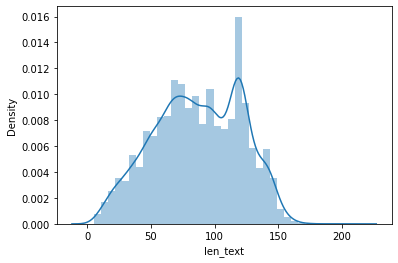

In [ ]:
import seaborn as sns
sns.distplot(train["len_text"])

In [ ]:
word_train

['our deeds are the reason of this # earthquake may allah forgive us all ',
 'forest fire near la ronge sask . canada ',
 "all residents asked to ' shelter in place ' are being notified by officers . no other evacuation or shelter in place orders are expected ",
 '# # , # # # people receive # wildfires evacuation orders in california ',
 'just got sent this photo from ruby # alaska as smoke from # wildfires pours into a school ',
 '# rockyfire update = > california hwy . # # closed in both directions due to lake county fire - # cafire # wildfires ',
 '# flood # disaster heavy rain causes flash flooding of streets in manitou , colorado springs areas ',
 'i am on top of the hill and i can see a fire in the woods . . . ',
 'there is an emergency evacuation happening now in the building across the street ',
 'i am afraid that the tornado is coming to our area . . . ',
 'three people died from the heat wave so far ',
 'haha south tampa is getting flooded hah - wait a second i live in south 

In [ ]:
tokens.fit_on_texts(word_train)


In [ ]:
df3 = pd.DataFrame(word_train)
df3.rename({0:"text"},inplace=True)

In [ ]:
train["clean_text"] = word_train

In [ ]:
check = train.copy()
check["train"] = train["clean_text"]

In [ ]:
vocab_new

{'#': 10219,
 '.': 6882,
 'the': 3282,
 '?': 3116,
 'a': 2226,
 ':': 2056,
 'in': 1986,
 'to': 1949,
 'of': 1830,
 'i': 1792,
 "'": 1769,
 '-': 1731,
 'and': 1426,
 'is': 1352,
 '!': 1163,
 'you': 907,
 'for': 895,
 'on': 861,
 'it': 779,
 'my': 679,
 'not': 660,
 'that': 624,
 ';': 581,
 'with': 572,
 'at': 542,
 'by': 527,
 'are': 525,
 's': 518,
 'this': 480,
 'have': 457,
 '&': 457,
 'from': 422,
 '/': 419,
 '_': 413,
 'be': 409,
 'was': 400,
 'do': 361,
 'am': 353,
 'like': 348,
 'amp': 344,
 ')': 342,
 '(': 340,
 'as': 332,
 'up': 330,
 'will': 330,
 'me': 329,
 'just': 323,
 'but': 323,
 'so': 318,
 'we': 295,
 'your': 293,
 'out': 273,
 'all': 268,
 'no': 266,
 'has': 262,
 'after': 260,
 'when': 255,
 'fire': 254,
 'an': 253,
 'if': 242,
 'he': 240,
 'they': 230,
 'get': 229,
 'new': 226,
 'now': 225,
 'what': 224,
 'via': 220,
 'more': 217,
 'about': 214,
 'news': 213,
 'or': 206,
 'people': 199,
 'one': 198,
 'how': 193,
 'been': 191,
 'who': 190,
 'there': 189,
 'over': 189

In [ ]:
print("Number of vocabulary = " + str(len(dict_check))+" OOV word condion = " + str(i))

In [ ]:
tokenize = []
vocab_new = generate_vocab(check)
for a in range(1,100):
  dict_check = {"OOV":0}
  for i in vocab_new:
    if vocab_new[i] > a:
      dict_check[i] = len(dict_check)
  print("Number of vocabulary = " + str(len(dict_check))+" OOV word condion = " + str(a))

Number of vocabulary = 6311 OOV word condion = 1
Number of vocabulary = 4326 OOV word condion = 2
Number of vocabulary = 3387 OOV word condion = 3
Number of vocabulary = 2788 OOV word condion = 4
Number of vocabulary = 2361 OOV word condion = 5
Number of vocabulary = 2082 OOV word condion = 6
Number of vocabulary = 1875 OOV word condion = 7
Number of vocabulary = 1697 OOV word condion = 8
Number of vocabulary = 1571 OOV word condion = 9
Number of vocabulary = 1458 OOV word condion = 10
Number of vocabulary = 1369 OOV word condion = 11
Number of vocabulary = 1282 OOV word condion = 12
Number of vocabulary = 1194 OOV word condion = 13
Number of vocabulary = 1132 OOV word condion = 14
Number of vocabulary = 1086 OOV word condion = 15
Number of vocabulary = 1028 OOV word condion = 16
Number of vocabulary = 974 OOV word condion = 17
Number of vocabulary = 941 OOV word condion = 18
Number of vocabulary = 895 OOV word condion = 19
Number of vocabulary = 855 OOV word condion = 20
Number of voc

In [ ]:
dict_check = {"OOV":0}
for i in vocab_new:
  if vocab_new[i] > 3:
    dict_check[i] = len(dict_check)
print("Number of vocabulary = " + str(len(dict_check))+" with OOV word condion > " + str(1))

Number of vocabulary = 3387 with OOV word condion > 1


In [ ]:
dict_check["i"]

10

In [ ]:
list_before_padding = []
list_word = []
for i in word_train:
  list2 = []
  for j in i.split():
    list_word.append(j)
    try:
      if j in vocab_new:
        list2.append(dict_check[j])
    except:
      list2.append(0)
  list_before_padding.append(list2)

In [ ]:
list_before_padding[:10]

[[128, 0, 27, 3, 855, 9, 29, 1, 266, 151, 1571, 0, 87, 53],
 [201, 58, 241, 764, 0, 0, 2, 1194],
 [53,
  1697,
  1572,
  8,
  11,
  1875,
  7,
  691,
  11,
  27,
  146,
  0,
  26,
  1698,
  2,
  54,
  398,
  267,
  71,
  1875,
  7,
  691,
  1369,
  27,
  1086],
 [1, 1, 0, 1, 1, 1, 72, 0, 1, 1458, 267, 1369, 7, 100],
 [47, 111, 1195, 29, 351, 32, 0, 1, 1876, 43, 283, 32, 1, 1458, 0, 81, 5, 197],
 [1,
  2788,
  399,
  268,
  0,
  100,
  1370,
  2,
  1,
  1,
  856,
  7,
  667,
  0,
  575,
  8,
  1132,
  420,
  58,
  12,
  1,
  0,
  1,
  1458],
 [1, 225, 1, 84, 857, 311, 1196, 821, 269, 9, 1699, 7, 0, 0, 1028, 2361, 1459],
 [10, 38, 18, 232, 9, 3, 1877, 13, 10, 83, 119, 5, 58, 7, 3, 0, 2, 2, 2],
 [77, 14, 59, 85, 267, 1282, 65, 7, 3, 601, 858, 3, 740],
 [10, 38, 2362, 22, 3, 538, 14, 259, 8, 128, 278, 2, 2, 2]]

In [ ]:
max_word_in_twitter = 70
padding = []
for i in list_before_padding:
  if len(i) >= max_word_in_twitter:
    padding.append(i[:max_word_in_twitter])
  else:
    list2 = i.copy()
    for j in range(max_word_in_twitter-len(i)):
      list2.append(0)
    padding.append(list2)
padding[:10]

[[128,
  0,
  27,
  3,
  855,
  9,
  29,
  1,
  266,
  151,
  1571,
  0,
  87,
  53,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [201,
  58,
  241,
  764,
  0,
  0,
  2,
  1194,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [53,
  1697,
  1572,
  8,
  11,
  1875,
  7,
  691,
  11,
  27,
  146,
  0,
  26,
  1698,
  2,
  54,
  398,
  267,
  71,
  1875,
  7,
  691,
  1369,
  27,
  1086,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,

In [ ]:
for i in padding[:10]:
  print(len(i))

70
70
70
70
70
70
70
70
70
70


In [ ]:
train

,keyword,location,text,target,len_text,clean_text
0,No Keyword,No Location,our deeds are the reason of this # ...,1,71,our deeds are the reason of this # earthquake ...
1,No Keyword,No Location,forest fire near la ronge sask . ...,1,40,forest fire near la ronge sask . canada
2,No Keyword,No Location,all residents asked to ' shelter in...,1,137,all residents asked to ' shelter in place ' ar...
3,No Keyword,No Location,"# # , ...",1,71,"# # , # # # people receive # wildfires evacuat..."
4,No Keyword,No Location,just got sent this photo from ruby # ...,1,90,just got sent this photo from ruby # alaska as...
...,...,...,...,...,...,...
7608,No Keyword,No Location,two giant cranes holding a bridge collapse int...,1,61,two giant cranes holding a bridge collapse int...
7609,No Keyword,No Location,the out of control wild fires in california ...,1,102,the out of control wild fires in california ev...
7610,No Keyword,No Location,m # . # ...,1,57,m # . # # [ # # : # # utc ] ? # km s of volcan...
7611,No Keyword,No Location,police investigating after an e - ...,1,146,police investigating after an e - bike collide...


In [ ]:
y_data = train.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_validation,Y_train,Y_validation = train_test_split(np.array(padding),y_data,test_size=0.15,shuffle=True)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from tensorflow.keras import layers
import keras
import tensorflow as tf
int_sequences_input = keras.Input(shape=(70), dtype=float)
embedded_sequences = layers.Embedding(3387,20,trainable=True)(int_sequences_input)
x = layers.Bidirectional(GRU(8,return_sequences=True))(embedded_sequences)
x = layers.GlobalMaxPool1D()(x)
x = layers.Dense(1, activation="relu")(x)
x = layers.Dropout(0.1)(x)
preds = layers.Dense(1, activation="sigmoid")(x)
model2 = keras.Model(int_sequences_input, preds)
model2.compile(optimizer=keras.optimizers.Adam(),
                loss='binary_crossentropy',
                metrics=['acc'])
model2.summary()

Model: "model_173"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_187 (InputLayer)       [(None, 70)]              0         
_________________________________________________________________
embedding_179 (Embedding)    (None, 70, 20)            67740     
_________________________________________________________________
bidirectional_182 (Bidirecti (None, 70, 16)            1440      
_________________________________________________________________
global_max_pooling1d_192 (Gl (None, 16)                0         
_________________________________________________________________
dense_364 (Dense)            (None, 1)                 17        
_________________________________________________________________
dropout_152 (Dropout)        (None, 1)                 0         
_________________________________________________________________
dense_365 (Dense)            (None, 1)                 2 

In [ ]:
model2.fit(X_train,Y_train, validation_data=(X_validation,Y_validation),
          epochs=10, batch_size=32)

Epoch 1/10
203/203 [==============================] - 13s 43ms/step - loss: 0.6915 - acc: 0.5547 - val_loss: 0.6854 - val_acc: 0.5841
Epoch 2/10
203/203 [==============================] - 8s 39ms/step - loss: 0.6867 - acc: 0.5664 - val_loss: 0.6821 - val_acc: 0.5841
Epoch 3/10
165/203 [=======================>......] - ETA: 1s - loss: 0.6847 - acc: 0.5686

In [ ]:
dict1 = {"OOV":0}
count = 1
for i in vocab_new:
  count += 1
  dict1[i] = count
  if count == 3387:
    break

In [ ]:
len(dict1)

3387

GridSearchCV to parameter tuning

In [ ]:
#Base model

from tensorflow.keras import layers
import keras
import tensorflow as tf
def Basemodel(padding,number_of_word):
  int_sequences_input = keras.Input(shape=(padding), dtype=float)
  embedded_sequences = layers.Embedding(number_of_word,100,trainable=True,weights=[embedding_matrix])(int_sequences_input)
  x = layers.Dropout(0.15)(embedded_sequences)
  x = layers.Bidirectional(GRU(16,return_sequences=True))(embedded_sequences)
  x = layers.GlobalMaxPool1D()(x)
  x = layers.Dense(8, activation="relu")(x)
  preds = layers.Dense(1, activation="sigmoid")(x)
  model2 = keras.Model(int_sequences_input, preds)
  model2.compile(optimizer=keras.optimizers.Adam(),
                loss='binary_crossentropy',
                metrics=['acc'])
  return model2

In [ ]:
from sklearn.metrics import f1_score,precision_score,recall_score

################################################################################
# Write a function to evaluate your model. Your function must make prediction  #
# using the input model and return f-score, precision, and recall of the model.#
# You can make predictions by calling model.predict().                         #
################################################################################
def evaluate(x_test, y_test, model):
  """
  Evaluate model on the splitted 10 percent testing set.
  """
  y_pred = model.predict(x_test)

  #map probability to class
  prob_to_class = lambda p: 1 if p[0]>=0.5 else 0
  y_pred = np.apply_along_axis(prob_to_class,1,y_pred)
    
  f1score = f1_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  recall = recall_score(y_test,y_pred)
  return f1score, precision, recall

In [ ]:
def load_glove_word():    
    EMBEDDING_FILE = 'glove.twitter.27B.100d.txt'
    dict_word = {}
    infile = open(EMBEDDING_FILE,"r")
    for line in infile:
      each_word = line.strip()[:line.find(" ")]
      others = np.array(line.strip()[line.find(" "):].strip().split(),dtype=float)
      dict_word[each_word] = others
    infile.close()
    return dict_word
glove_word = load_glove_word()

In [ ]:
from sklearn.metrics import f1_score
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras import backend as K
callbacks_list = [
        TensorBoard(log_dir='./Graph/ff', histogram_freq=1, write_graph=True, write_grads=False),
        ModelCheckpoint(
            weight_path_feedforward_nn,
            save_best_only=True,
            save_weights_only=True,
            monitor='val_loss',
            mode='min',
            verbose=1
        )
  ]
tokenize = []
vocab_new = generate_vocab(check)
OOV_condition_more_than = [1,2,3,4,5]
word_condition = [i for i in range(50,110,10)]
for a in OOV_condition_more_than:
  dict_check = {"OOV":0}
  for i in vocab_new:
    if vocab_new[i] > a:
      dict_check[i] = len(dict_check)
  list_before_padding = []
  for i in word_train:
    list2 = []
    for j in i.split():
      try:
        if j in vocab_new:
          list2.append(dict_check[j])
      except:
        list2.append(0)
    list_before_padding.append(list2)
  for max_word in word_condition:
    max_word_in_twitter = max_word
    padding = []
    for i in list_before_padding:
      if len(i) >= max_word_in_twitter:
        padding.append(i[:max_word_in_twitter])
      else:
        list2 = i.copy()
        for j in range(max_word_in_twitter-len(i)):
          list2.append(0)
        padding.append(list2)
    print("OOV_Condition = ",a)
    print("word_condition = ",max_word)
    Model1 = Basemodel(max_word,len(dict_check))
    weight_path_feedforward_nn='./model_weight_with_dropout_nn.h5'
    X_train,X_validation,Y_train,Y_validation = train_test_split(np.array(padding),y_data,test_size=0.15,shuffle=True,random_state=2020)
    Model1.fit(X_train,Y_train, validation_data=(X_validation,Y_validation),
          epochs=3, batch_size=32,callbacks=callbacks_list)
    print()
    f1score, precision, recall = evaluate(X_validation,Y_validation,Model1)
    print("F1-score = ",f1score)
    print("Precision score = ",precision)
    print("Recall score = ",recall)
    print()

OOV_Condition =  1
word_condition =  50


ValueError: ignored

In [ ]:
def load_glove_fast(word_index, max_words, embed_size=100):
    EMBEDDING_FILE = 'glove.twitter.27B.100d.txt'
    emb_mean, emb_std = -0.005838499, 0.48782197

    embedding_matrix = np.random.normal(emb_mean, emb_std, (max_words, embed_size))
    with open(EMBEDDING_FILE, 'r', encoding="utf8") as f:
        for line in f:
            word, vec = line.split(' ', 1)
            if word not in word_index:
                continue
            i = word_index[word]
            if i >= max_words:
                continue
            embedding_vector = np.asarray(vec.split(' '), dtype='float32')[:200]
            if len(embedding_vector) == 100:
                embedding_matrix[i] = embedding_vector
    return embedding_matrix
embedding_matrix = load_glove_fast(dict1,max_words = 6000)

In [ ]:
len(dict1)

6000

In [ ]:
embedding_matrix

array([[-0.20601774, -0.05037122,  0.06341732, ...,  0.0879392 ,
         0.05341237, -0.16822162],
       [-0.44234215, -0.09023696,  0.05275598, ..., -0.40652534,
         0.09943141, -0.29422393],
       [-0.018755  ,  0.011657  ,  0.039336  , ...,  0.44284999,
         0.90390003, -0.23698001],
       ...,
       [-0.75200029,  0.8331561 , -0.68361562, ..., -0.20396257,
        -0.84819993,  0.08324844],
       [-0.59074702, -0.5753291 ,  0.59652616, ..., -0.45849361,
         0.33562069, -0.70114301],
       [-0.019457  ,  0.74461001, -0.57615   , ...,  1.00629997,
         0.229     ,  0.75353003]])

In [ ]:
#Base model

from tensorflow.keras import layers
import keras
import tensorflow as tf
def Basemodel(padding,number_of_word):
  int_sequences_input = keras.Input(shape=(padding), dtype=float)
  embedded_sequences = layers.Embedding(number_of_word,100,trainable=True,weights=[embedding_matrix])(int_sequences_input)
  x = layers.Dropout(0.15)(embedded_sequences)
  x = layers.Bidirectional(GRU(16,return_sequences=True))(embedded_sequences)
  x = layers.GlobalMaxPool1D()(x)
  x = layers.Dense(8, activation="relu")(x)
  preds = layers.Dense(1, activation="sigmoid")(x)
  model2 = keras.Model(int_sequences_input, preds)
  model2.compile(optimizer=keras.optimizers.Adam(),
                loss='binary_crossentropy',
                metrics=['acc'])
  return model2

In [ ]:
max_word_in_twitter = 50
padding = []
for i in list_before_padding:
  if len(i) >= max_word_in_twitter:
    padding.append(i[:max_word_in_twitter])
  else:
    list2 = i.copy()
    for j in range(max_word_in_twitter-len(i)):
      list2.append(0)
    padding.append(list2)
X_train,X_validation,Y_train,Y_validation = train_test_split(np.array(padding),y_data,test_size=0.15,shuffle=True,random_state=2020)

In [ ]:
len(X_train[0])

50

In [ ]:
new_padding = []
for i in padding:
  list_new = []
  for j in i:
    if j >= 3387:
      list_new.append(0)
    else:
      list_new.append(j)
  new_padding.append(list_new)

In [ ]:
new_padding

[[128,
  0,
  27,
  3,
  855,
  9,
  29,
  1,
  266,
  151,
  1571,
  0,
  87,
  53,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [201,
  58,
  241,
  764,
  0,
  0,
  2,
  1194,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [53,
  1697,
  1572,
  8,
  11,
  1875,
  7,
  691,
  11,
  27,
  146,
  0,
  26,
  1698,
  2,
  54,
  398,
  267,
  71,
  1875,
  7,
  691,
  1369,
  27,
  1086,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [1,
  1,
  0,
  1,
  1,
  1,
  72,
  0,
  1,
  1458,
  267,
  1369,
  7,
  100,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  

In [ ]:
!pip install transformers

     |████████████████████████████████| 1.5MB 8.3MB/s 
     |████████████████████████████████| 2.9MB 20.5MB/s 
     |████████████████████████████████| 890kB 59.6MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=92a03db10d53a67c8906d610aad6c4d7c9269c28529729dc06ca2341af9b40d0
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
from transformers import pipeline
classifier = pipeline('sentiment-analysis')
result = classifier('We are very happy to show you the 🤗 Transformers library.')
classifier = pipeline(‘sentiment-analysis’, model=”nlptown/bert-base-multilingual-uncased-sentiment”)

In [ ]:
X_train,X_validation,Y_train,Y_validation = train_test_split(np.array(new_padding),y_data,test_size=0.15,shuffle=True,random_state=2020)
int_sequences_input = keras.Input(shape=(50), dtype=float)
embedded_sequences = layers.Embedding(3387,50,trainable=True)(int_sequences_input)
x = layers.Bidirectional(LSTM(16,return_sequences=True))(embedded_sequences)
x = layers.GlobalMaxPool1D()(x)
x = layers.Dense(16, activation="relu")(x)
x = layers.Dropout(0.1)(x)
preds = layers.Dense(1, activation="sigmoid")(x)
New_model = keras.Model(int_sequences_input, preds)
New_model.compile(optimizer=keras.optimizers.Adam(),
                loss='binary_crossentropy',
                metrics=['acc'])
New_model.fit(X_train,Y_train, validation_data=(X_validation,Y_validation),epochs=10, batch_size=64)

Epoch 1/10
102/102 [==============================] - 8s 48ms/step - loss: 0.6669 - acc: 0.6016 - val_loss: 0.5378 - val_acc: 0.7259
Epoch 2/10
102/102 [==============================] - 4s 40ms/step - loss: 0.4908 - acc: 0.7922 - val_loss: 0.4882 - val_acc: 0.7995
Epoch 3/10
102/102 [==============================] - 4s 40ms/step - loss: 0.3931 - acc: 0.8435 - val_loss: 0.4549 - val_acc: 0.8030
Epoch 4/10
102/102 [==============================] - 4s 40ms/step - loss: 0.3466 - acc: 0.8676 - val_loss: 0.4531 - val_acc: 0.7986
Epoch 5/10
102/102 [==============================] - 4s 39ms/step - loss: 0.2780 - acc: 0.8962 - val_loss: 0.4970 - val_acc: 0.7881
Epoch 6/10
101/102 [============================>.] - ETA: 0s - loss: 0.2525 - acc: 0.9082

KeyboardInterrupt: ignored

In [ ]:
df2 = pd.DataFrame({"text":train.clean_text.values,"labels":train.target.values})
df2

,text,labels
0,our deeds are the reason of this # earthquake ...,1
1,forest fire near la ronge sask . canada,1
2,all residents asked to ' shelter in place ' ar...,1
3,"# # , # # # people receive # wildfires evacuat...",1
4,just got sent this photo from ruby # alaska as...,1
...,...,...
7608,two giant cranes holding a bridge collapse int...,1
7609,the out of control wild fires in california ev...,1
7610,m # . # # [ # # : # # utc ] ? # km s of volcan...,1
7611,police investigating after an e - bike collide...,1


In [ ]:
df2 = df2.sample(frac=1).reset_index(drop=True)
df2

,text,labels
0,maj muzzamil pilot offr of mi - # # crashed ne...,1
1,hellfire ep - silentmind & amp ;,0
2,sign the petition to protect bees instead of t...,0
3,who is tomislav salopek the islamic state ' s ...,0
4,ukraine argues for us weapons during pelosi ' ...,1
...,...,...
7608,we ' ll crash down like an avalanche,0
7609,i had my meltdown yesterday . i am going to mi...,0
7610,# saudiarabia # # confirmed dead as suicide bo...,1
7611,never fear quarrels but seek hazardous adventu...,0


In [ ]:
train_df = df2.iloc[:6471,:]
test_df = df2.iloc[6471:,:]

In [ ]:
train_df

,text,labels
0,maj muzzamil pilot offr of mi - # # crashed ne...,1
1,hellfire ep - silentmind & amp ;,0
2,sign the petition to protect bees instead of t...,0
3,who is tomislav salopek the islamic state ' s ...,0
4,ukraine argues for us weapons during pelosi ' ...,1
...,...,...
6466,# hour parade like # # people collapsed . # on...,1
6467,a rocket to the moon ? sleeping with sirens ? ...,0
6468,mh # # # : aircraft debris found on la reunion...,1
6469,and if she had a screaming baby you would have...,0


In [ ]:
test_df

,text,labels
6471,blood group a + ve is associated with gastric ...,0
6472,you do not know because you do not smoke . the...,1
6473,on # st august # turkish jets bombed the villa...,1
6474,i forgot to bring chocolate with me . major di...,0
6475,just demolished a snowball ? ?,0
...,...,...
7608,we ' ll crash down like an avalanche,0
7609,i had my meltdown yesterday . i am going to mi...,0
7610,# saudiarabia # # confirmed dead as suicide bo...,1
7611,never fear quarrels but seek hazardous adventu...,0


In [ ]:
!pip install simpletransformers

     |████████████████████████████████| 204kB 7.8MB/s 
     |████████████████████████████████| 1.8MB 13.6MB/s 
     |████████████████████████████████| 7.4MB 21.5MB/s 
     |████████████████████████████████| 71kB 8.7MB/s 
     |████████████████████████████████| 1.1MB 45.8MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
     |████████████████████████████████| 317kB 45.7MB/s 
     |████████████████████████████████| 81kB 10.7MB/s 
     |████████████████████████████████| 163kB 50.8MB/s 
     |████████████████████████████████| 133kB 53.2MB/s 
     |████████████████████████████████| 102kB 14.6MB/s 
     |████████████████████████████████| 4.5MB 42.5MB/s 
     |████████████████████████████████| 112kB 61.2MB/s 
     |████████████████████████████████| 71kB 11.0MB/s 
     |████████████████████████████████| 122kB 60.1MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-cp36-none-any.whl size=16171 sha256=393af5d16089c2e69816fafe553c593dd931f901d9dc50dc81213f3191cfa171
  Stored in di

In [ ]:
from simpletransformers.classification import ClassificationModel

# Create a TransformerModel
model = ClassificationModel('roberta', 'roberta-base',use_cuda=False)

# Train the model
model.train_model(train_df)

# Evaluate the model
result, model_outputs, wrong_predictions = model.eval_model(test_df)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(test_df)

In [ ]:
result

{'eval_loss': 0.48425281558420274,
 'fn': 148,
 'fp': 65,
 'mcc': 0.6148232829211598,
 'tn': 598,
 'tp': 331}

In [ ]:
Answer = model.predict(test_y)

In [ ]:
Answer1 = pd.DataFrame(Answer[:][0]).value_counts()

In [ ]:
submission

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [ ]:
submission["target"] = Answer[:][0]

In [ ]:
submission.to_csv("submission_first.csv",index=False)

In [ ]:
(598+331)/(598+331+148+65)

0.8134851138353766

In [ ]:
test_df

,text,labels
6471,blood group a + ve is associated with gastric ...,0
6472,you do not know because you do not smoke . the...,1
6473,on # st august # turkish jets bombed the villa...,1
6474,i forgot to bring chocolate with me . major di...,0
6475,just demolished a snowball ? ?,0
...,...,...
7608,we ' ll crash down like an avalanche,0
7609,i had my meltdown yesterday . i am going to mi...,0
7610,# saudiarabia # # confirmed dead as suicide bo...,1
7611,never fear quarrels but seek hazardous adventu...,0


In [ ]:
model_outputs

array([[ 1.28971028, -0.77051353],
       [ 1.28668332, -0.7569328 ],
       [-1.59155083,  1.60214865],
       ...,
       [-1.59200168,  1.60178375],
       [ 1.29300213, -0.76118624],
       [-1.59352553,  1.5817405 ]])

In [ ]:
len(wrong_predictions)

213

In [ ]:
test_df

,text,labels
6471,blood group a + ve is associated with gastric ...,0
6472,you do not know because you do not smoke . the...,1
6473,on # st august # turkish jets bombed the villa...,1
6474,i forgot to bring chocolate with me . major di...,0
6475,just demolished a snowball ? ?,0
...,...,...
7608,we ' ll crash down like an avalanche,0
7609,i had my meltdown yesterday . i am going to mi...,0
7610,# saudiarabia # # confirmed dead as suicide bo...,1
7611,never fear quarrels but seek hazardous adventu...,0


In [ ]:
(1142-213)/1142

0.8134851138353766